# Fig.2 - Evolution of MDR Types (w/ 5x3 subpanels)

Change plot's default size and font

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

You need to define these variables each run to reflect certain drug coverage settings.

In [2]:
file_path_cyc = 'raw_data/set7_c/monthly/set7c_%smonthly_data_0.txt'
file_path_mft = 'raw_data/set7_m/monthly/set7m_%smonthly_data_0.txt'
file_path_adpcyc = 'raw_data/set7_ac/monthly/set7ac_%smonthly_data_0.txt'
plot_savepath = 'generated_figures/set7_fig2.svg'

In [3]:
IQR_only=False

Load Computed NTF IQR Data

In [4]:
# Compute Median Value of NTF
from plot_helper import NTF_IQR_compute
MFT_ntf = NTF_IQR_compute('raw_data/set7_m/summary/set7m_%ssummary_0.txt')
Cyc_ntf = NTF_IQR_compute('raw_data/set7_c/summary/set7c_%ssummary_0.txt')
AC_ntf = NTF_IQR_compute('raw_data/set7_ac/summary/set7ac_%ssummary_0.txt')

Load output files to prepare `dflist`

In [5]:
from constant import REPORTDAYS, HEADER_NAME, COLUMNS_TO_DROP
import pandas as pd

In [6]:
dflist_cyc = []
dflist_mft = []
dflist_adpcyc = []
for i in range(1,101):
  dflist_cyc.append(pd.read_csv(file_path_cyc % i, index_col=False, \
                                names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP))
  dflist_mft.append(pd.read_csv(file_path_mft % i, index_col=False, \
                                names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP))
  dflist_adpcyc.append(pd.read_csv(file_path_adpcyc % i, index_col=False, \
                                names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP))

Test plot to get y-limit of each row (NO ANNOTATION)

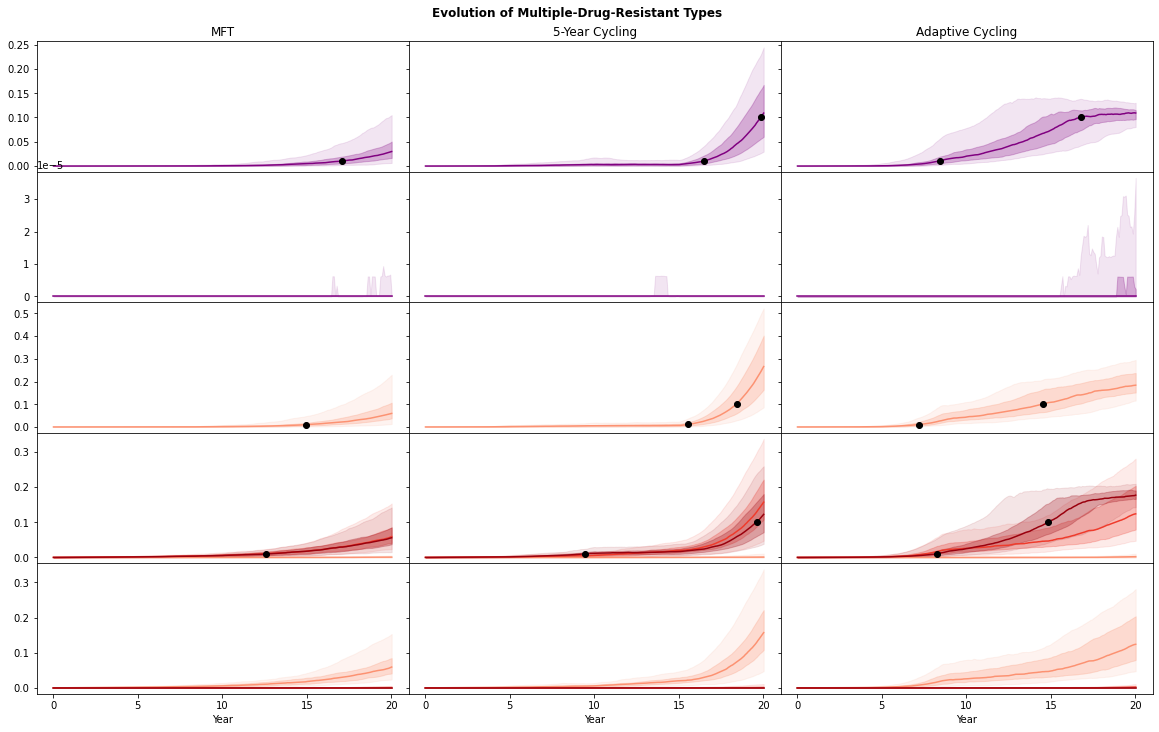

In [7]:
# prepare plt for 5x3 subpanels
from plot_helper import xaxis_label_ticker
import matplotlib.ticker as ticker
xlocator = 5*365
ticks_x = xaxis_label_ticker()

fig, axs = plt.subplots(5, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
fig.suptitle('Evolution of Multiple-Drug-Resistant Types', y=0.92, fontweight='bold')
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
      (ax10, ax11, ax12), (ax13, ax14, ax15) = axs

# plot trends for most-dangerous-triple (2 types)
from plotter import fig2_dangerous_triple, \
                    fig2_dangerous_double

#  MFT
fig2_dangerous_triple(ax1, dflist_mft, 'TYY..Y2.', IQR_only)
fig2_dangerous_triple(ax4, dflist_mft, 'KNF..Y2.', IQR_only)
fig2_dangerous_double(ax7, dflist_mft, 'DHA-PPQ', IQR_only)
fig2_dangerous_double(ax10, dflist_mft, 'ASAQ', IQR_only)
fig2_dangerous_double(ax13, dflist_mft, 'AL', IQR_only)

#  Cycling
fig2_dangerous_triple(ax2, dflist_cyc, 'TYY..Y2.', IQR_only)
fig2_dangerous_triple(ax5, dflist_cyc, 'KNF..Y2.', IQR_only)
fig2_dangerous_double(ax8, dflist_cyc, 'DHA-PPQ', IQR_only)
fig2_dangerous_double(ax11, dflist_cyc, 'ASAQ', IQR_only)
fig2_dangerous_double(ax14, dflist_cyc, 'AL', IQR_only)

#  Adaptive Cycling
fig2_dangerous_triple(ax3, dflist_adpcyc, 'TYY..Y2.', IQR_only)
fig2_dangerous_triple(ax6, dflist_adpcyc, 'KNF..Y2.', IQR_only)
fig2_dangerous_double(ax9, dflist_adpcyc, 'DHA-PPQ', IQR_only)
fig2_dangerous_double(ax12, dflist_adpcyc, 'ASAQ', IQR_only)
fig2_dangerous_double(ax15, dflist_adpcyc, 'AL', IQR_only)

# Labeling Strategies
ax1.set_title('MFT')
ax2.set_title('5-Year Cycling')
ax3.set_title('Adaptive Cycling')

ax13.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax13.xaxis.set_major_formatter(ticks_x)
ax14.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax14.xaxis.set_major_formatter(ticks_x)
ax15.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax15.xaxis.set_major_formatter(ticks_x)

ax13.set_xlabel('Year')
ax14.set_xlabel('Year')
ax15.set_xlabel('Year')

(_, row1ylim) = ax1.get_ylim()
(_, row2ylim) = ax4.get_ylim()
(_, row3ylim) = ax7.get_ylim()
(_, row4ylim) = ax10.get_ylim()
(_, row5ylim) = ax13.get_ylim()

Final Version of Plot

In [8]:
#upper_row_lim = max(row1ylim, row2ylim)
lower_row_lim = max(row3ylim, row4ylim, row5ylim)
TITLE_FONTSIZE = 20
XLABEL_FONTSIZE = 20
YLABEL_PADDING = 290
lower_row_lowlim = 0 - lower_row_lim * 0.05

Text(0, 0.5, 'Genotype Frequency')

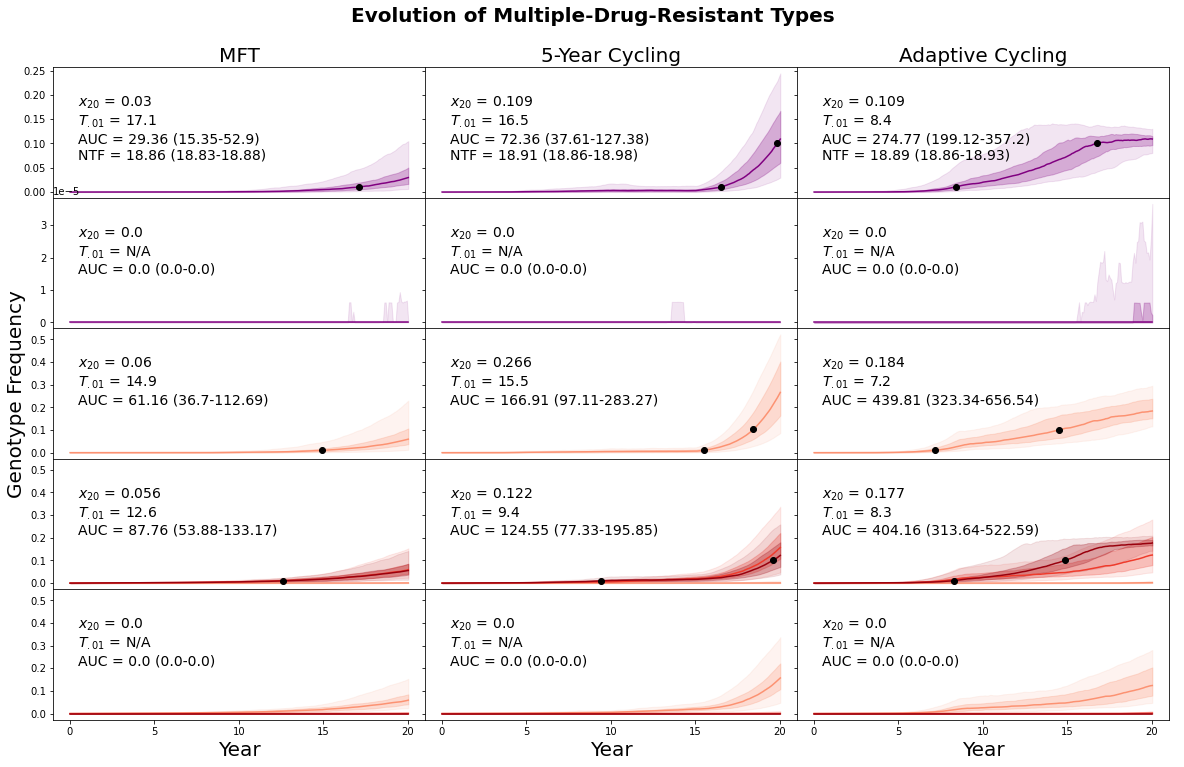

In [9]:
fig, axs = plt.subplots(5, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')

fig.suptitle('Evolution of Multiple-Drug-Resistant Types', y=0.95, fontweight='bold', fontsize=TITLE_FONTSIZE)
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), \
      (ax10, ax11, ax12), (ax13, ax14, ax15) = axs

ax7.set_ylim(lower_row_lowlim, lower_row_lim)
ax8.set_ylim(lower_row_lowlim, lower_row_lim)
ax9.set_ylim(lower_row_lowlim, lower_row_lim)
ax10.set_ylim(lower_row_lowlim, lower_row_lim)
ax11.set_ylim(lower_row_lowlim, lower_row_lim)
ax12.set_ylim(lower_row_lowlim, lower_row_lim)
ax13.set_ylim(lower_row_lowlim, lower_row_lim)
ax14.set_ylim(lower_row_lowlim, lower_row_lim)
ax15.set_ylim(lower_row_lowlim, lower_row_lim)

# plot trends for most-dangerous-triple (2 types combined)
from plotter import fig2_dangerous_triple, \
                    fig2_dangerous_double

#  MFT
fig2_dangerous_triple(ax1, dflist_mft, 'TYY..Y2.', IQR_only, annoty=row1ylim, ntf=MFT_ntf)
fig2_dangerous_triple(ax4, dflist_mft, 'KNF..Y2.', IQR_only, annoty=row2ylim)
fig2_dangerous_double(ax7, dflist_mft, 'DHA-PPQ', IQR_only, annoty=lower_row_lim)
fig2_dangerous_double(ax10, dflist_mft, 'ASAQ', IQR_only, annoty=lower_row_lim)
fig2_dangerous_double(ax13, dflist_mft, 'AL', IQR_only, annoty=lower_row_lim)

#  Cycling
fig2_dangerous_triple(ax2, dflist_cyc, 'TYY..Y2.', IQR_only, annoty=row1ylim, ntf=Cyc_ntf)
fig2_dangerous_triple(ax5, dflist_cyc, 'KNF..Y2.', IQR_only, annoty=row2ylim)
fig2_dangerous_double(ax8, dflist_cyc, 'DHA-PPQ', IQR_only, annoty=lower_row_lim)
fig2_dangerous_double(ax11, dflist_cyc, 'ASAQ', IQR_only, annoty=lower_row_lim)
fig2_dangerous_double(ax14, dflist_cyc, 'AL', IQR_only, annoty=lower_row_lim)

#  Adaptive Cycling
fig2_dangerous_triple(ax3, dflist_adpcyc, 'TYY..Y2.', IQR_only, annoty=row1ylim, ntf=AC_ntf)
fig2_dangerous_triple(ax6, dflist_adpcyc, 'KNF..Y2.', IQR_only, annoty=row2ylim)
fig2_dangerous_double(ax9, dflist_adpcyc, 'DHA-PPQ', IQR_only, annoty=lower_row_lim)
fig2_dangerous_double(ax12, dflist_adpcyc, 'ASAQ', IQR_only, annoty=lower_row_lim)
fig2_dangerous_double(ax15, dflist_adpcyc, 'AL', IQR_only, annoty=lower_row_lim)

# Labeling Strategies
ax1.set_title('MFT', fontsize=TITLE_FONTSIZE)
ax2.set_title('5-Year Cycling', fontsize=TITLE_FONTSIZE)
ax3.set_title('Adaptive Cycling', fontsize=TITLE_FONTSIZE)
ax13.set_xlabel('Year', fontsize=TITLE_FONTSIZE)
ax14.set_xlabel('Year', fontsize=TITLE_FONTSIZE)
ax15.set_xlabel('Year', fontsize=TITLE_FONTSIZE)

ax13.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax13.xaxis.set_major_formatter(ticks_x)
ax14.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax14.xaxis.set_major_formatter(ticks_x)
ax15.xaxis.set_major_locator(ticker.MultipleLocator(xlocator))
ax15.xaxis.set_major_formatter(ticks_x)

# ax1.set_ylabel('Triple-resistant \ngenotypes carrying \n76T, 86Y, Y184, 580Y, \nand double-copy $pfpm2/3$', 
#                multialignment='left', 
#                horizontalalignment='left', rotation=0, 
#                fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
# ax4.set_ylabel('Triple-resistant \ngenotypes carrying \nK76, N86, 184F, 580Y, \nand double-copy $pfpm2/3$', 
#                multialignment='left', 
#                horizontalalignment='left', rotation=0, 
#                fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
# ax7.set_ylabel('Double-resistant genotypes \nto DHA-PPQ', multialignment='left', 
#                horizontalalignment='left', rotation=0, 
#                fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
# ax10.set_ylabel('Double-resistant genotypes \nto ASAQ', multialignment='left', 
#                 horizontalalignment='left', rotation=0, 
#                 fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)
# ax13.set_ylabel('Double-resistant genotypes \nto AL', multialignment='left', 
#                 horizontalalignment='left', rotation=0, 
#                 fontsize=XLABEL_FONTSIZE, labelpad=YLABEL_PADDING)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# add common x- and y-labels
plt.ylabel('Genotype Frequency', fontsize=XLABEL_FONTSIZE)

plt.savefig(fname=plot_savepath, format='svg')